In [2]:
import numpy as np
import pandas as pd

In [3]:
BSIF = np.load('resultados_npy/BSIF.npy', allow_pickle=True)[0]
LBP = np.load('resultados_npy/LBP.npy', allow_pickle=True)[0]
LPQ = np.load('resultados_npy/LPQ.npy', allow_pickle=True)[0]
MOBILENET = np.load('resultados_npy/MobileNet.npy', allow_pickle=True)[0]
VGG = np.load('resultados_npy/VGG16.npy', allow_pickle=True)[0]

In [4]:
'''
    BSIF[1] # classe 1 
    BSIF[1][3] # classe 1, patch 3
    BSIF[1][3]['f1_all'] # classe 1, patch 3, all f1-score = Folds [ 1, 2, 3, 4, 5]
'''

"\n    BSIF[1] # classe 1 \n    BSIF[1][3] # classe 1, patch 3\n    BSIF[1][3]['f1_all'] # classe 1, patch 3, all f1-score = Folds [ 1, 2, 3, 4, 5]\n"

In [5]:
# df = pd.DataFrame(BSIF[1][3]['f1_all'])

In [6]:
# df = pd.DataFrame(BSIF)

In [7]:
# BSIF[1][1]['f1_all']

# Fazer todos os patch 3

In [4]:
patch3_five = []
patch3_all = []
for classe in range(1,81):
    patch3_all.append(BSIF[classe][3]['f1_all']) # classe 1, patch 3, all f1-score
    patch3_five.append(BSIF[classe][3]['f1_five']) # classe 1, patch 3, all f1-score

In [5]:
BSIF_p3_ = pd.DataFrame(patch3_five)
BSIF_p3_.describe()

,0,1,2,3,4
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.817088,0.825463,0.825000,0.826136,0.791372
std,0.107766,0.109676,0.112764,0.111600,0.097322
min,0.666667,0.666667,0.666667,0.666667,0.666667
25%,0.757576,0.757576,0.757576,0.757576,0.757576
50%,0.757576,0.757576,0.757576,0.757576,0.757576
75%,0.888889,1.000000,1.000000,1.000000,0.757576
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
BSIF_p3__ = pd.DataFrame(patch3_all)
BSIF_p3__.describe()

,0,1,2,3,4
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.972034,0.974622,0.968033,0.974909,0.963661
std,0.024981,0.017246,0.029923,0.013076,0.023971
min,0.854433,0.893056,0.793885,0.930125,0.885345
25%,0.968631,0.968631,0.962179,0.968631,0.955645
50%,0.981289,0.981289,0.981289,0.981090,0.974194
75%,0.981289,0.981289,0.981289,0.981289,0.981289
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Generalizando

In [5]:
d = {
    'BSIF': {
        'PATCH 1': {'f1_five': {}, 'f1_all': {} },
        'PATCH 3': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 5': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 10': {'f1_five': {}, 'f1_all': {} }
    },
    'LBP': {
        'PATCH 1': {'f1_five': {}, 'f1_all': {} },
        'PATCH 3': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 5': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 10': {'f1_five': {}, 'f1_all': {} }
    },
    'LPQ': {
        'PATCH 1': {'f1_five': {}, 'f1_all': {} },
        'PATCH 3': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 5': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 10': {'f1_five': {}, 'f1_all': {} }
    },
    'MobileNet': {
        'PATCH 1': {'f1_five': {}, 'f1_all': {} },
        'PATCH 3': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 5': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 10': {'f1_five': {}, 'f1_all': {} }
    },
    'VGG16': {
        'PATCH 1': {'f1_five': {}, 'f1_all': {} },
        'PATCH 3': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 5': {'f1_five': {}, 'f1_all': {} }, 
        'PATCH 10': {'f1_five': {}, 'f1_all': {} }
    },
}

In [6]:
''' Apenas MobileNet e VGG começam do 0 e vão até o 79 nas suas KEys da list '''
def oddKeys(myList):
    tmpList = {}
    for i in list(myList.keys()):
        tmpList[i+1] = myList.pop(i)
    
    return tmpList
    

In [7]:
MOBILENET = oddKeys(MOBILENET)

In [8]:
VGG = oddKeys(VGG)

In [9]:
for variavel, FEATURE in [ ["BSIF", BSIF],["LBP", LBP] ,["LPQ", LPQ], ["MobileNet", MOBILENET] , ["VGG16", VGG]]:
    for patch in [1, 3, 5, 10]:
        patch_all = []
        patch_five = []
        for classe in range(1,81):
            patch_all.append(FEATURE[classe][patch]['f1_all'])
            patch_five.append(FEATURE[classe][patch]['f1_five'])
        d[variavel]['PATCH '+str(patch)]['f1_all'] = patch_all
        d[variavel]['PATCH '+str(patch)]['f1_five'] = patch_five

# Resultado

In [10]:
pd.DataFrame(pd.DataFrame(d).loc[['PATCH 1']]['BSIF'][0]['f1_five']).describe()

,0,1,2,3,4
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.842508,0.854461,0.821901,0.856902,0.799453
std,0.118149,0.117510,0.110574,0.118489,0.116220
min,0.666667,0.666667,0.666667,0.757576,0.555556
25%,0.757576,0.757576,0.757576,0.757576,0.757576
50%,0.757576,0.757576,0.757576,0.757576,0.757576
75%,1.000000,1.000000,1.000000,1.000000,0.781145
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
pd.DataFrame(pd.DataFrame(d).loc[['PATCH 1']]['BSIF'][0]['f1_all']).describe()

,0,1,2,3,4
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.961526,0.961146,0.971023,0.969685,0.954528
std,0.031815,0.048345,0.018822,0.029614,0.046848
min,0.838309,0.756836,0.908121,0.828799,0.740625
25%,0.954645,0.958800,0.962179,0.967977,0.949026
50%,0.975000,0.981289,0.981090,0.981289,0.968631
75%,0.981289,0.981289,0.981289,0.981289,0.981289
max,1.000000,1.000000,1.000000,1.000000,1.000000


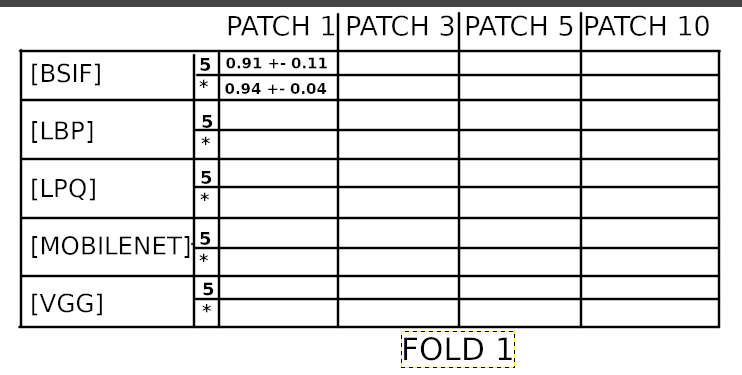

__[0 , 1 , 2 , 3 , 4 ]__ -> `FOLDS`

__Fold 1__ = Todos do *fold 1* foi a `test_x` `test_Y` e o restante foi o `train_x` `train_Y`

__Fold 2__ = Todos do *fold 2* foi a `test_x` `test_Y` e o restante foi o `train_x` `train_Y`

1 - Faço uma media de todos os Folds ? ou deixo como na imagem ?

In [90]:
pd.DataFrame(pd.DataFrame(d).loc[['PATCH 3']]['BSIF'][0]['f1_all']).describe().loc['mean'].mean()

0.9706517884944699

In [91]:
pd.DataFrame(pd.DataFrame(d).loc[['PATCH 3']]['BSIF'][0]['f1_all']).describe().loc['mean'].std()

0.0047833319915803136

# Gerar Tabelas

In [61]:
from pyexcel_ods import get_data

In [63]:
data = get_data("planilha.ods")
import json
print(json.dumps(data))

{"pagina1": [["", "Patch 1", "Patch 3", "Patch 5", "Patch 10"], ["BSIF", 5], ["*"], ["LBP", 5], ["*"], ["LPQ", 5], ["*"], ["MOBILENET", 5], ["*"], ["VGG", 5], ["*"], [], [], []]}


In [56]:
#! pip install pyexcel-ods

In [57]:
#!pip install tabulate
#from tabulate import tabulate

In [54]:
#pd.DataFrame(pd.DataFrame(d).loc[['PATCH 1']]['BSIF'][0]['f1_all']).describe().loc['mean'].mean()

In [13]:
for FEATURE in [ "BSIF", "LBP" , "LPQ", "MobileNet", "VGG16"]:
    print(f"\n--------------------{FEATURE}-------------------")
    for PATCH in ["PATCH 1", "PATCH 3", "PATCH 5", "PATCH 10" ]:
        for F1 in ["f1_five", "f1_all"]:
            media = pd.DataFrame(pd.DataFrame(d).loc[[PATCH]][FEATURE][0][F1]).describe().loc['mean'].mean()
            desvio = pd.DataFrame(pd.DataFrame(d).loc[[PATCH]][FEATURE][0][F1]).describe().loc['mean'].std()
            print(f'{FEATURE}[{PATCH}]' )
            print(f'---- [{F1}] --- {media:.2f} +- {desvio:.2f}')
        print("===============================")


--------------------BSIF-------------------
BSIF[PATCH 1]
---- [f1_five] --- 0.84 +- 0.02
BSIF[PATCH 1]
---- [f1_all] --- 0.96 +- 0.01
BSIF[PATCH 3]
---- [f1_five] --- 0.82 +- 0.01
BSIF[PATCH 3]
---- [f1_all] --- 0.97 +- 0.00
BSIF[PATCH 5]
---- [f1_five] --- 0.82 +- 0.02
BSIF[PATCH 5]
---- [f1_all] --- 0.97 +- 0.00
BSIF[PATCH 10]
---- [f1_five] --- 0.81 +- 0.01
BSIF[PATCH 10]
---- [f1_all] --- 0.98 +- 0.00

--------------------LBP-------------------
LBP[PATCH 1]
---- [f1_five] --- 0.83 +- 0.03
LBP[PATCH 1]
---- [f1_all] --- 0.96 +- 0.00
LBP[PATCH 3]
---- [f1_five] --- 0.80 +- 0.02
LBP[PATCH 3]
---- [f1_all] --- 0.97 +- 0.00
LBP[PATCH 5]
---- [f1_five] --- 0.80 +- 0.02
LBP[PATCH 5]
---- [f1_all] --- 0.98 +- 0.00
LBP[PATCH 10]
---- [f1_five] --- 0.79 +- 0.01
LBP[PATCH 10]
---- [f1_all] --- 0.98 +- 0.00

--------------------LPQ-------------------
LPQ[PATCH 1]
---- [f1_five] --- 0.84 +- 0.03
LPQ[PATCH 1]
---- [f1_all] --- 0.96 +- 0.01
LPQ[PATCH 3]
---- [f1_five] --- 0.82 +- 0.02
LPQ[PATCH

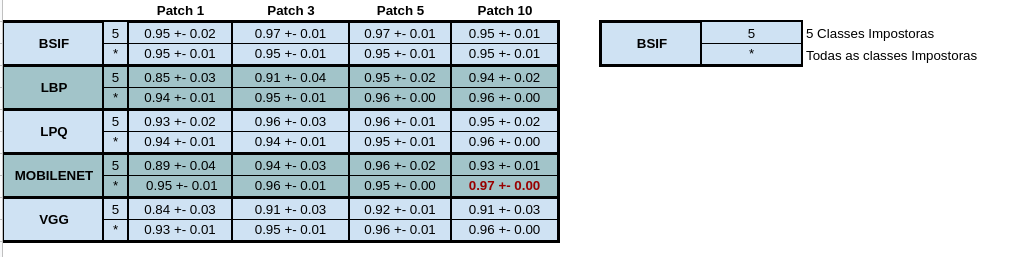